# Imports
Antonio Capanna III
04/08/2020

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# **Line Plot**

In [0]:
livedata = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(livedata)
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [0]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17


In [0]:
df = df.groupby('Country/Region').sum().reset_index()
ranked = df.sort_values(by=df.columns[-1], ascending=False).head(10)
ranked

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
171,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43847,53740,65778,83836,101657,121478,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223
156,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942
84,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586
61,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,90848,93773,98963,110065
65,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663
36,China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718
80,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589
175,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,86,116,164,207,274,322,384,459,459,802,1144,1145,1551,1960,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949
170,Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,5,6,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109
161,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928,14076,14829,15922,16605,17768,18827,19606,20505,21100,21657,22253


In [0]:
ranked = ranked.reset_index()
ranked = ranked.drop('index', axis = 1)
ranked

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43847,53740,65778,83836,101657,121478,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223
1,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942
2,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586
3,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,90848,93773,98963,110065
4,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663
5,China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718
6,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589
7,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,86,116,164,207,274,322,384,459,459,802,1144,1145,1551,1960,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949
8,Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,5,6,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109
9,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928,14076,14829,15922,16605,17768,18827,19606,20505,21100,21657,22253


In [0]:
s = ranked['Country/Region']
s[1]

'Spain'

In [0]:
ranked = ranked.rename({0: s[0], 1: s[1], 2: s[2], 3: s[3], 4: s[4], 5: s[5], 6: s[6], 7: s[7], 8: s[8], 9: s[9]}, axis='index')
ranked

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
US,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43847,53740,65778,83836,101657,121478,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223
Spain,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942
Italy,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586
France,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,90848,93773,98963,110065
Germany,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663
China,China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718
Iran,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589
United Kingdom,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,86,116,164,207,274,322,384,459,459,802,1144,1145,1551,1960,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949
Turkey,Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,5,6,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109
Switzerland,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928,14076,14829,15922,16605,17768,18827,19606,20505,21100,21657,22253


In [0]:
ranked = ranked.drop('Country/Region',axis=1)
rankedt = ranked.transpose()
rankedt

,US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Switzerland
1/22/20,1,0,0,0,0,548,0,0,0,0
1/23/20,1,0,0,0,0,643,0,0,0,0
1/24/20,2,0,0,2,0,920,0,0,0,0
1/25/20,2,0,0,3,0,1406,0,0,0,0
1/26/20,5,0,0,3,0,2075,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/3/20,275586,119199,119827,65202,91159,82511,53183,38689,20921,19606
4/4/20,308850,126168,124632,90848,96092,82543,55743,42477,23934,20505
4/5/20,337072,131646,128948,93773,100123,82602,58226,48436,27069,21100
4/6/20,366667,136675,132547,98963,103374,82665,60500,52279,30217,21657


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
line1=rankedt.iloc[0:,0]
line2=rankedt.iloc[0:,1]
line3=rankedt.iloc[0:,2]
line4=rankedt.iloc[0:,3]
line5=rankedt.iloc[0:,4]
line6=rankedt.iloc[0:,5]
line7=rankedt.iloc[0:,6]
line8=rankedt.iloc[0:,7]
line9=rankedt.iloc[0:,8]
line10=rankedt.iloc[0:,9]

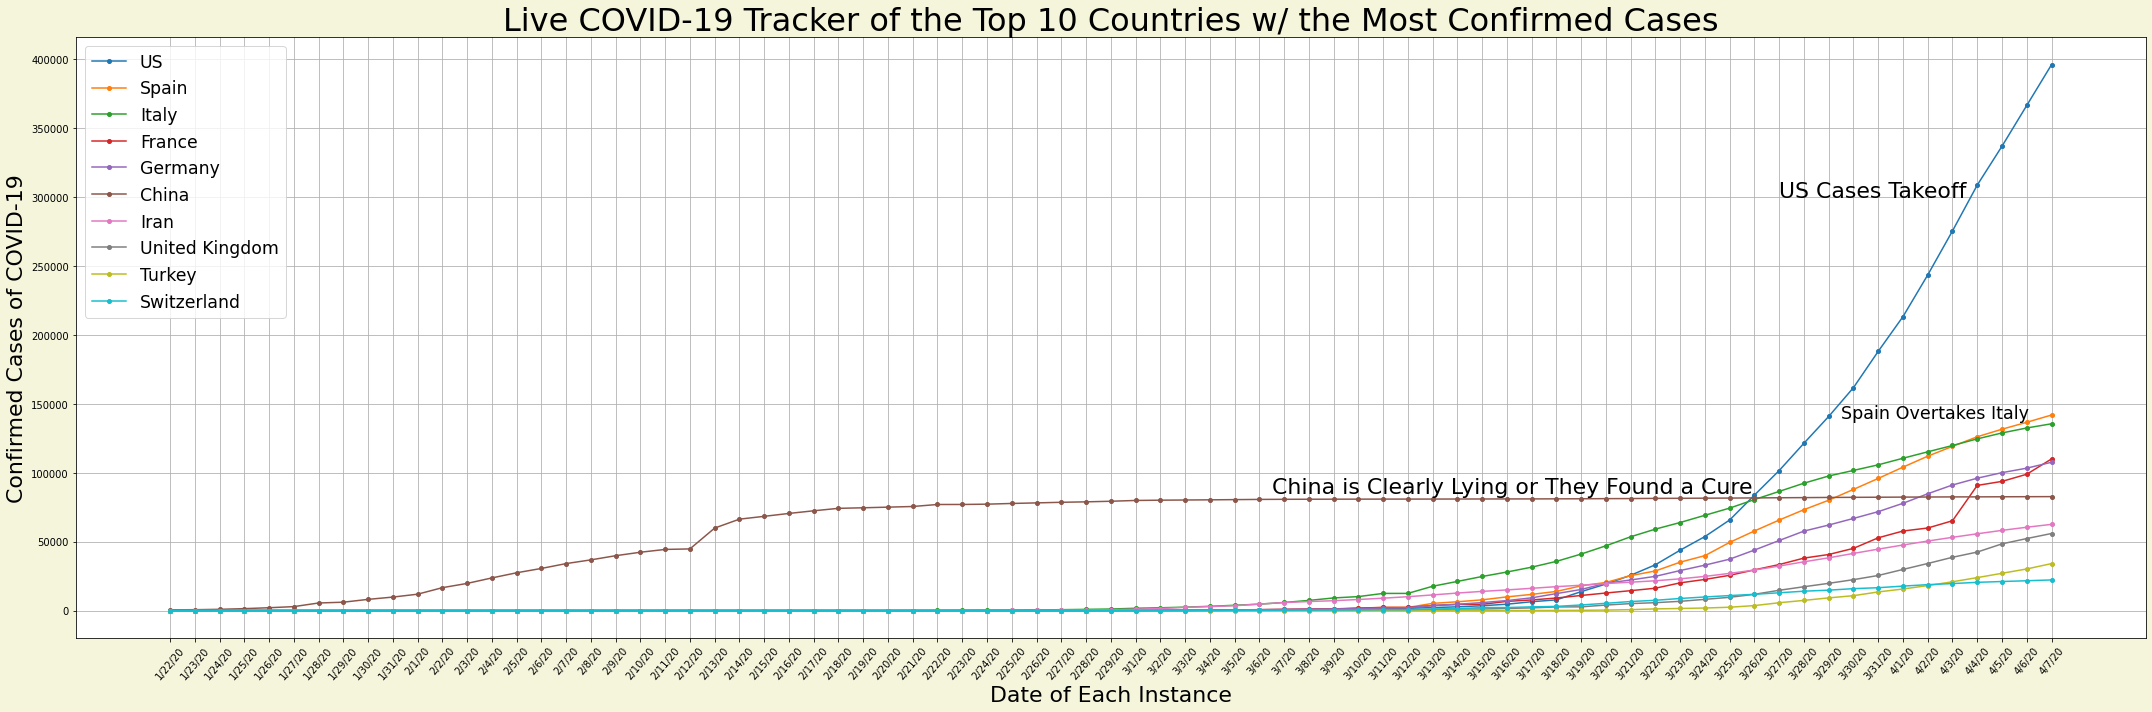

In [0]:
plt.figure(figsize=(30,10), facecolor= '#f5f5dc')
plt.text(44.5,85500, "China is Clearly Lying or They Found a Cure", fontsize=22)
plt.text(65,300000, "US Cases Takeoff", fontsize=22)
plt.text(67.5,140000, "Spain Overtakes Italy", fontsize=17.5)
plt.plot(line1,marker='o', markersize=4, label = s[0])
plt.plot(line2,marker='o', markersize=4, label = s[1])
plt.plot(line3,marker='o', markersize=4, label = s[2])
plt.plot(line4,marker='o', markersize=4, label = s[3])
plt.plot(line5,marker='o', markersize=4, label = s[4])
plt.plot(line6,marker='o', markersize=4, label = s[5])
plt.plot(line7,marker='o', markersize=4, label = s[6])
plt.plot(line8,marker='o', markersize=4, label = s[7])
plt.plot(line9,marker='o', markersize=4, label = s[8])
plt.plot(line10,marker='o', markersize=4, label = s[9])
plt.title('Live COVID-19 Tracker of the Top 10 Countries w/ the Most Confirmed Cases', fontsize=32)
plt.xlabel('Date of Each Instance', fontsize=22)
plt.ylabel('Confirmed Cases of COVID-19', fontsize=22)
plt.xticks(rotation='50')
plt.grid()
plt.legend(fontsize='xx-large')
plt.tight_layout()

# **Bubble Plot**

In [0]:
# download geopandas
!pip install geopandas
import geopandas as gpd
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import geopandas as gpd

In [0]:
USlivedata = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
dfU = pd.read_csv(USlivedata)

In [0]:
dfU.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43


In [0]:
dfU = dfU.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Combined_Key'], axis=1)

In [0]:
dfU.head()

,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,American Samoa,-14.2710,-170.1320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guam,13.4443,144.7937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121
2,Northern Mariana Islands,15.0979,145.6739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,6,6,6,6,6
3,Puerto Rico,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573
4,Virgin Islands,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43


In [0]:
tmpdata = dfU

In [0]:
tmpdata = tmpdata[~tmpdata['Province_State'].str.contains(",")]
print(tmpdata.shape)
tmpdata.head()

(3253, 80)


,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,American Samoa,-14.2710,-170.1320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guam,13.4443,144.7937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121
2,Northern Mariana Islands,15.0979,145.6739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,6,6,6,6,6
3,Puerto Rico,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573
4,Virgin Islands,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43


In [0]:
tmpdata['Province_State'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

In [0]:
x = ['Diamond Princess', 
     'Grand Princess', 
     'District of Columbia',
     'Puerto Rico', 
     'Guam', 
     'Virgin Islands',
     'Alaska',
     'Hawaii',
     'Northern Mariana Islands',
     'American Samoa']

tmpdata = tmpdata[~tmpdata['Province_State'].isin(x)]
tmpdata.shape

(3205, 80)

In [0]:
tmpdata = tmpdata.groupby('Province_State').sum().reset_index()
tmpdata.head(48)

,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Alabama,2203.246784,-5809.578199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169
1,Arizona,505.138555,-1671.948482,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,4,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1530,1715,1937,2187,2486,2732,2870
2,Arkansas,2618.391704,-6932.548370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946
3,California,2194.949775,-7002.258461,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,12,21,25,35,51,59,81,95,101,144,178,221,281,372,373,557,700,828,1005,1243,1405,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019,17351
4,Colorado,2491.870366,-6751.119357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,7,7,14,30,45,76,101,99,132,167,218,277,363,475,591,704,723,1021,1430,1433,1740,2307,2311,2966,2982,3342,3742,4188,4950,5183,5429
5,Connecticut,332.909441,-581.254637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5,11,23,24,41,68,96,159,194,194,327,415,618,875,1012,1291,1524,1993,2571,3128,3557,3824,4914,5276,5675,6906,7781
6,Delaware,117.327830,-226.599712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,6,6,8,16,19,30,39,45,56,68,104,119,130,163,214,232,264,319,368,393,450,593,673,783,928
7,Florida,1939.030577,-5540.949842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,7,10,13,15,24,30,50,76,100,101,190,306,432,564,763,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,6956,9008,10268,11545,12350,13324,14545
8,Georgia,5216.556611,-13288.811358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,5,5,10,17,23,31,42,73,99,121,146,197,287,485,555,621,772,1026,1247,1525,2000,2366,2651,2808,3929,4638,5348,5831,6160,6647,7314,8822
9,Idaho,1947.589655,-5036.245496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,4,8,9,23,36,42,42,68,81,91,146,205,234,281,340,515,566,776,891,1022,1078,1101,1170


In [0]:
# set the filepath (fp)
# load the shapefile
fp = '/content/drive/My Drive/OPIM 5512/Week 10/tl_2017_us_state (1)/tl_2017_us_state.shp'
USA = gpd.read_file(fp)

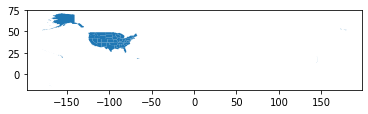

In [0]:
USA.plot()

In [0]:
# download States and Regions
url = 'https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv'
lower48 = pd.read_csv(url)
print(lower48.shape) # need to drop a few
lower48.head()

(51, 4)


,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [0]:
# show the unique codes
lower48['State Code'].unique()

# let's get rid of DC, HI and AK
lower48 = lower48[lower48['State Code'] != 'DC']
lower48 = lower48[lower48['State Code'] != 'AK']
lower48 = lower48[lower48['State Code'] != 'HI']
lower48.shape # looks like we are good!

(48, 4)

In [0]:
# rename 'State Code' to 'STUSPS' to make the join easy
lower48.rename(columns = {'State Code':'STUSPS'}, inplace = True)

In [0]:
# now we can join these other attributes to the shapefile
USA = USA.merge(lower48, on='STUSPS')

In [0]:
# we confirm that our data has a different shape
# less rows, more columns
print(USA.shape)
USA.head()

(48, 18)


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State,Region,Division
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",West Virginia,South,South Atlantic
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ...",Florida,South,South Atlantic
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",Illinois,Midwest,East North Central
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",Minnesota,Midwest,West North Central
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",Maryland,South,South Atlantic


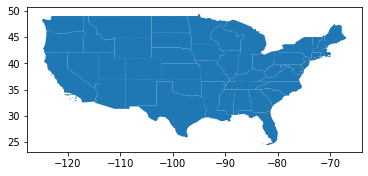

In [0]:
# and now we can plot it
# doesn't that look great?
USA.plot()

In [0]:
print(USA.columns)
print(tmpdata.columns)

# to make the join easier, we rename tmpdata['Province/State'] to 'NAME'
tmpdata.rename(columns={'Province_State':'NAME'}, inplace = True)
tmpdata.head()

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'State', 'Region', 'Division'],
      dtype='object')
Index(['Province_State', 'Lat', 'Long_', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/

,NAME,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Alabama,2203.246784,-5809.578199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169
1,Arizona,505.138555,-1671.948482,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,4,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1530,1715,1937,2187,2486,2732,2870
2,Arkansas,2618.391704,-6932.548370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946
3,California,2194.949775,-7002.258461,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,12,21,25,35,51,59,81,95,101,144,178,221,281,372,373,557,700,828,1005,1243,1405,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019,17351
4,Colorado,2491.870366,-6751.119357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,7,7,14,30,45,76,101,99,132,167,218,277,363,475,591,704,723,1021,1430,1433,1740,2307,2311,2966,2982,3342,3742,4188,4950,5183,5429


In [0]:
USA = USA.merge(tmpdata,
                on="NAME")

In [0]:
#FIXING THE LAT AND LONG FOR LIVE
url = r'https://inkplant.com/code/state-latitudes-longitudes'
tables = pd.read_html(url) # Returns list of all tables on page
sp500_table = tables[0] # Select table of interest
sp500_table.head()

,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


In [0]:
USA = USA.merge(sp500_table, on="State")

In [0]:
USA.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State,Region,Division,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,Latitude,Longitude
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",West Virginia,South,South Atlantic,2134.783954,-4433.959998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,8,12,16,16,22,39,52,76,96,113,145,162,191,216,237,282,324,345,412,38.491226,-80.954453
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ...",Florida,South,South Atlantic,1939.030577,-5540.949842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,3,3,7,10,13,15,24,30,50,76,100,101,190,306,432,564,763,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,6956,9008,10268,11545,12350,13324,14545,27.766279,-81.686783
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",Illinois,Midwest,East North Central,4064.049006,-9096.189667,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,...,3,4,4,4,5,5,6,7,7,12,25,32,46,64,66,83,161,272,422,585,753,1049,1285,1537,1865,2538,3024,3491,4596,5056,5994,6980,7695,8904,10357,11259,12262,12271,40.349457,-88.986137
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",Minnesota,Midwest,West North Central,3963.025129,-8215.492913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,2,5,9,14,21,21,53,59,77,89,113,134,167,234,261,286,344,396,441,503,576,629,689,742,788,865,935,986,1069,45.694454,-93.900192
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",Maryland,South,South Atlantic,936.358097,-1840.211223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,5,5,8,9,12,18,27,24,42,60,85,107,149,193,244,290,349,425,583,775,995,1239,1413,1660,1986,2331,2758,3125,3617,4045,4371,39.063946,-76.802101


In [0]:
USA['Lat'] = USA['Latitude']

In [0]:
USA['Long_'] = USA['Longitude']

In [0]:
USA = USA.drop(['Latitude', 'Longitude'], axis=1)#DROP THE FIX TO KEEP THE CODE CLEAN

In [0]:
USA.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State,Region,Division,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",West Virginia,South,South Atlantic,38.491226,-80.954453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,8,12,16,16,22,39,52,76,96,113,145,162,191,216,237,282,324,345,412
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ...",Florida,South,South Atlantic,27.766279,-81.686783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,7,10,13,15,24,30,50,76,100,101,190,306,432,564,763,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,6956,9008,10268,11545,12350,13324,14545
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",Illinois,Midwest,East North Central,40.349457,-88.986137,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,...,2,2,3,4,4,4,5,5,6,7,7,12,25,32,46,64,66,83,161,272,422,585,753,1049,1285,1537,1865,2538,3024,3491,4596,5056,5994,6980,7695,8904,10357,11259,12262,12271
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",Minnesota,Midwest,West North Central,45.694454,-93.900192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,2,2,5,9,14,21,21,53,59,77,89,113,134,167,234,261,286,344,396,441,503,576,629,689,742,788,865,935,986,1069
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",Maryland,South,South Atlantic,39.063946,-76.802101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,5,5,8,9,12,18,27,24,42,60,85,107,149,193,244,290,349,425,583,775,995,1239,1413,1660,1986,2331,2758,3125,3617,4045,4371


In [0]:
test = pd.DataFrame(USA.iloc[:,[18,19,-1]])
test = gpd.GeoDataFrame(test, geometry = gpd.points_from_xy(test.Long_, test.Lat))
test = test.iloc[:,2:]
test

,4/7/20,geometry
0,412,POINT (-80.95445 38.49123)
1,14545,POINT (-81.68678 27.76628)
2,12271,POINT (-88.98614 40.34946)
3,1069,POINT (-93.90019 45.69445)
4,4371,POINT (-76.80210 39.06395)
5,1229,POINT (-71.51178 41.68089)
6,1170,POINT (-114.47883 44.24046)
7,715,POINT (-71.56390 43.45249)
8,3299,POINT (-79.80642 35.63007)
9,575,POINT (-72.71069 44.04588)


In [0]:
bins=[-1, 100, 500, 5000, 15000, 1000000]
labels=['xkcd:silver','xkcd:orange','xkcd:orangered','xkcd:maroon', 'red']
test['colors_as'] = pd.cut(test.iloc[:,0], bins=bins, labels=labels)

test

,4/7/20,geometry,colors_as
0,412,POINT (-80.95445 38.49123),xkcd:orange
1,14545,POINT (-81.68678 27.76628),xkcd:maroon
2,12271,POINT (-88.98614 40.34946),xkcd:maroon
3,1069,POINT (-93.90019 45.69445),xkcd:orangered
4,4371,POINT (-76.80210 39.06395),xkcd:orangered
5,1229,POINT (-71.51178 41.68089),xkcd:orangered
6,1170,POINT (-114.47883 44.24046),xkcd:orangered
7,715,POINT (-71.56390 43.45249),xkcd:orangered
8,3299,POINT (-79.80642 35.63007),xkcd:orangered
9,575,POINT (-72.71069 44.04588),xkcd:orangered


In [0]:
colors_as = list()
for c in colors_as:
  if test.iloc[:,0] <100:
    c == 'xkcd:silver'
  elif test.iloc[:,0] >= 100 & test.iloc[:,-1] < 500:
    c == 'xkcd:orange'
  elif test.iloc[:,0] >= 500 & test.iloc[:,-1] < 5000:
    c == 'xkcd:orangered'
  elif test.iloc[:,0] >= 5000 & test.iloc[:,-1] < 15000:
    c == 'xkcd:maroon'
  else:
    c == 'red'

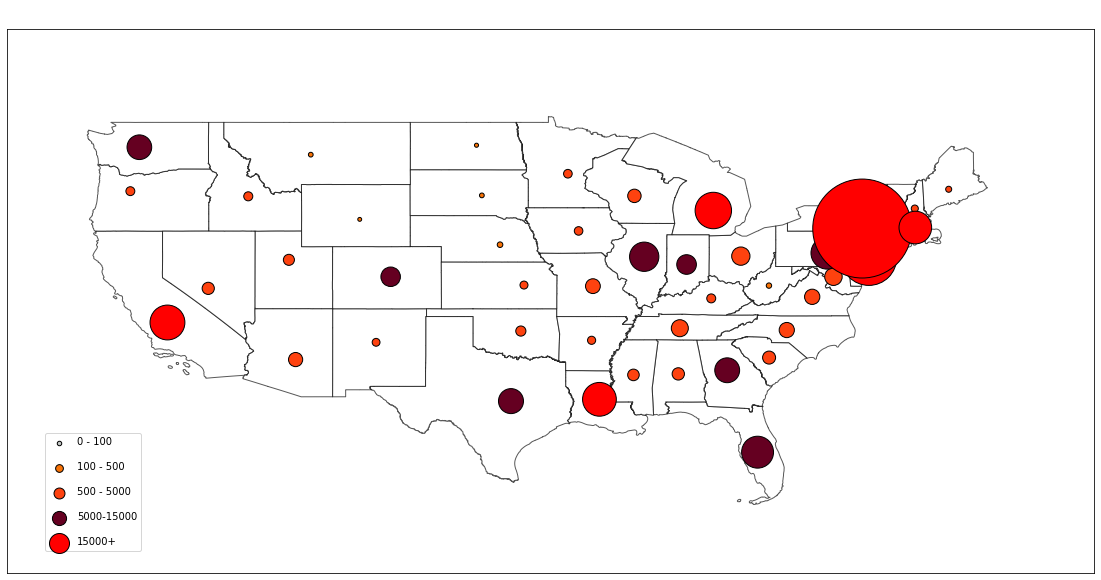

In [0]:
markersize = test.iloc[:,0] / 100 * 7

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

# Plots the outline of the state
base = USA.plot(ax=ax, color='white', edgecolor='black', linewidth=1, alpha = 0.65);

test.plot(ax=base, marker='o', color = test['colors_as'], markersize=markersize, alpha=1, edgecolor='black');

ax.set_title('Live Feed of Corona Confirmed in the United States of America', color='white', fontsize=15, pad=10);

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
# Sets figure limits
ax.set_xlim(-130, -60);
ax.set_ylim(20, 55);


# The legend is generated not from the data that you see, but from 
# several other layers that are plotted outside the figure (at lat=lon=0).
# This makes it easier to populate the legend box with circles of exact 
# sizes and colors.

ax.scatter([0], [0], c='xkcd:silver', alpha=1, s=1/10*200,
            label='0 - 100', edgecolor='black')
ax.scatter([0], [0], c='xkcd:orange', alpha=1, s=3/10*200,
            label='100 - 500', edgecolor='black')
ax.scatter([0], [0], c='xkcd:orangered', alpha=1, s=6/10*200,
            label='500 - 5000', edgecolor='black')
ax.scatter([0], [0], c='xkcd:maroon', alpha=1, s=10/10*200,
            label='5000-15000', edgecolor='black')
ax.scatter([0], [0], c='red', alpha=1, s=20/10*200,
            label='15000+', edgecolor='black')

ax.legend(scatterpoints=1, frameon=True,
        labelspacing=1.5, loc='lower left', fontsize=10, 
        bbox_to_anchor=(0.03,0.03), title_fontsize=20);

plt.show()

# **Colored Table**

In [0]:
USlivedata2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
dfU2 = pd.read_csv(USlivedata2)
#Cases Confirmed

In [0]:
dfU2.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43


In [0]:
dfU2 = dfU2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Combined_Key', 'Lat', 'Long_'], axis=1)

In [0]:
tmpdata2 = dfU2

In [0]:
tmpdata2 = tmpdata2[~tmpdata2['Province_State'].str.contains(",")]
print(tmpdata2.shape)
tmpdata2.head()

(3253, 78)


,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,6,6,6,6,6
3,Puerto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573
4,Virgin Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43


In [0]:
tmpdata2['Province_State'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

In [0]:
tmpdata2 = tmpdata2.groupby('Province_State').sum().reset_index()
tmpdata2.head(58)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,5,8,11,13,18,30,34,41,56,58,85,102,114,119,132,143,157,171,185,190,213
2,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,4,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1530,1715,1937,2187,2486,2732,2870
4,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946
5,California,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,12,21,25,35,51,59,81,95,101,144,178,221,281,372,373,557,700,828,1005,1243,1405,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019,17351
6,Colorado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,7,7,14,30,45,76,101,99,132,167,218,277,363,475,591,704,723,1021,1430,1433,1740,2307,2311,2966,2982,3342,3742,4188,4950,5183,5429
7,Connecticut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5,11,23,24,41,68,96,159,194,194,327,415,618,875,1012,1291,1524,1993,2571,3128,3557,3824,4914,5276,5675,6906,7781
8,Delaware,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,6,6,8,16,19,30,39,45,56,68,104,119,130,163,214,232,264,319,368,393,450,593,673,783,928
9,Diamond Princess,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,47,47,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49


In [0]:
tmpdata2['Total Cases'] = tmpdata2.sum(axis=1)

In [0]:
USlivedeaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
dfU3 = pd.read_csv(USlivedeaths)

In [0]:
dfU3.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [0]:
dfU3 = dfU3.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Combined_Key', 'Lat', 'Long_', 'Population'], axis=1)

In [0]:
dfU3.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3,Puerto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23
4,Virgin Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [0]:
tmpdata3 = dfU3

In [0]:
tmpdata3 = tmpdata3[~tmpdata3['Province_State'].str.contains(",")]
print(tmpdata3.shape)
tmpdata3.head()

(3253, 78)


,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3,Puerto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23
4,Virgin Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [0]:
tmpdata3['Province_State'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

In [0]:
tmpdata3 = tmpdata3.groupby('Province_State').sum().reset_index()
tmpdata3.head(58)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,10,10,23,27,32,38,44,45,49,64
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,3,5,6,6,6
2,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,5,6,8,13,15,17,20,24,29,32,41,52,64,65,73
4,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,5,6,7,8,10,12,12,14,16,16,18
5,California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,4,4,4,3,5,7,12,16,18,24,25,30,39,50,65,81,94,110,124,146,173,199,238,265,289,348,380,432
6,Colorado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,2,4,4,6,6,7,8,16,19,27,31,47,47,69,69,80,97,111,140,150,179
7,Connecticut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,8,10,12,19,21,27,33,34,36,69,85,112,131,165,189,206,277
8,Delaware,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,5,6,6,10,11,12,14,14,14,15,16
9,Diamond Princess,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
tmpdata3 = pd.DataFrame(tmpdata3.iloc[:,[0,-1]])
tmpdata3

,Province_State,4/7/20
0,Alabama,64
1,Alaska,6
2,American Samoa,0
3,Arizona,73
4,Arkansas,18
5,California,432
6,Colorado,179
7,Connecticut,277
8,Delaware,16
9,Diamond Princess,0


In [0]:
tmpdata3 = tmpdata3.set_axis([*tmpdata3.columns[:-1], 'Deaths'], axis=1, inplace=False)
tmpdata3

,Province_State,Deaths
0,Alabama,64
1,Alaska,6
2,American Samoa,0
3,Arizona,73
4,Arkansas,18
5,California,432
6,Colorado,179
7,Connecticut,277
8,Delaware,16
9,Diamond Princess,0


In [0]:
tmpdata2 = tmpdata2.merge(tmpdata3,
                on="Province_State")
tmpdata2.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,Total Cases,Deaths
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169,17230,64
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,5,8,11,13,18,30,34,41,56,58,85,102,114,119,132,143,157,171,185,190,213,1892,6
2,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,4,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1530,1715,1937,2187,2486,2732,2870,22275,73
4,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946,9053,18


In [0]:
z = tmpdata2['Province_State']

In [0]:
tmpdata2 = tmpdata2.rename({0: z[0], 1: z[1], 2: z[2], 3: z[3], 4: z[4], 5: z[5], 6: z[6], 7: z[7], 8: z[8], 9: z[9], 10: z[10], 11: z[11], 12: z[12], 13: z[13], 14: z[14], 15: z[15], 16: z[16], 17: z[17], 18: z[18], 19: z[19], 20: z[20], 21: z[21], 22: z[22], 23: z[23], 24: z[24], 25: z[25], 26: z[26], 27: z[27], 28: z[28], 29: z[29], 30: z[30], 31: z[31], 32: z[32], 33: z[33], 34: z[34], 35: z[35], 36: z[36], 37: z[37], 38: z[38], 39: z[39], 40: z[40], 41: z[41], 42: z[42], 43: z[43], 44: z[44], 45: z[45], 46: z[46], 47: z[47], 48: z[48], 49: z[49], 50: z[50], 51: z[51], 52: z[52], 53: z[53], 54: z[54], 55: z[55], 56: z[56], 57: z[57]}, axis='index')

In [0]:
tmpdata2 = tmpdata2.drop('Province_State', axis = 1)

In [0]:
dfHeat = tmpdata2.iloc[:,[-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
dfHeat.shape

(58, 23)

In [0]:
dfHeat = dfHeat.sort_values(by='Total Cases', ascending=False)

In [0]:
import matplotlib.pyplot as plt
from matplotlib import colors
#dfHeat.style.background_gradient(cmap='Reds')
#Normal

In [0]:
def background_gradient(s, m, M, cmap='Reds', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

df = dfHeat
df.style.apply(background_gradient,
               cmap='Reds',
               m=df.min().min(),
               M=df.max().max(),
               low=.00000000000000001,
               high=.0001)

,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,Total Cases,Deaths
New York,3038,5704,8403,11727,15800,20884,25681,30841,37877,44876,52410,59648,66663,75833,83948,92506,102987,113833,123160,131815,139875,1252792,5489
New Jersey,397,741,890,1327,1914,2844,3675,4402,6876,8825,11124,13386,16636,18696,22255,25590,29895,34124,37505,41090,44416,327309,1232
California,828,1005,1243,1405,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019,17351,145584,432
Michigan,119,259,402,540,1035,1329,1793,2296,2845,3634,4650,5488,6498,7615,9315,10791,12744,14225,15718,17221,18970,137681,845
Massachusetts,252,328,413,523,640,777,1159,1838,2417,3240,4257,4955,5752,6620,7738,8966,10402,11736,12500,13837,15202,114688,356
Florida,306,432,564,763,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,6956,9008,10268,11545,12350,13324,14545,111493,283
Louisiana,257,392,537,763,837,1172,1388,1795,2304,2744,3315,3540,4025,5237,6424,9159,10297,12496,13010,14867,16284,111371,582
Illinois,272,422,585,753,1049,1285,1537,1865,2538,3024,3491,4596,5056,5994,6980,7695,8904,10357,11259,12262,12271,102796,308
Washington,1022,1374,1524,1793,1997,2221,2328,2591,3207,3477,4030,4465,4923,5432,5608,6389,6846,7247,7825,8311,8692,96374,400
Pennsylvania,155,206,311,399,509,698,946,1260,1795,2345,2845,3432,4155,4963,6009,7268,8570,10444,11589,13127,14853,96272,247


In [0]:
df = dfHeat
s = df.style.background_gradient(cmap='Reds', low=0, high=1, axis=0)

def background_gradient(s, m, M, cmap='Reds', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

df.style.apply(background_gradient,
               cmap='Reds',
               m=df.min().min(),
               M=df.max().max(),
               low=0,
               high=.1)
#I tried changing the low and high and did not see much of a difference

,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,Total Cases,Deaths
New York,3038,5704,8403,11727,15800,20884,25681,30841,37877,44876,52410,59648,66663,75833,83948,92506,102987,113833,123160,131815,139875,1252792,5489
New Jersey,397,741,890,1327,1914,2844,3675,4402,6876,8825,11124,13386,16636,18696,22255,25590,29895,34124,37505,41090,44416,327309,1232
California,828,1005,1243,1405,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019,17351,145584,432
Michigan,119,259,402,540,1035,1329,1793,2296,2845,3634,4650,5488,6498,7615,9315,10791,12744,14225,15718,17221,18970,137681,845
Massachusetts,252,328,413,523,640,777,1159,1838,2417,3240,4257,4955,5752,6620,7738,8966,10402,11736,12500,13837,15202,114688,356
Florida,306,432,564,763,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,6956,9008,10268,11545,12350,13324,14545,111493,283
Louisiana,257,392,537,763,837,1172,1388,1795,2304,2744,3315,3540,4025,5237,6424,9159,10297,12496,13010,14867,16284,111371,582
Illinois,272,422,585,753,1049,1285,1537,1865,2538,3024,3491,4596,5056,5994,6980,7695,8904,10357,11259,12262,12271,102796,308
Washington,1022,1374,1524,1793,1997,2221,2328,2591,3207,3477,4030,4465,4923,5432,5608,6389,6846,7247,7825,8311,8692,96374,400
Pennsylvania,155,206,311,399,509,698,946,1260,1795,2345,2845,3432,4155,4963,6009,7268,8570,10444,11589,13127,14853,96272,247


In [0]:
s
#I ran s just because I thought that the definition was for s specifically, at least in the stackoverflow post we are following along with. Yeah, NY does look better in all red but not much of a difference in my opinion